In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler # For Normalie values
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-statistics/videos-stats.csv
/kaggle/input/youtube-statistics/comments.csv


In [2]:
data = pd.read_csv("/kaggle/input/youtube-statistics/videos-stats.csv")
comm = pd.read_csv("/kaggle/input/youtube-statistics/comments.csv")

In [3]:
data.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [4]:
comm.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [5]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
comm.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
data.duplicated().sum() , comm.duplicated().sum()


(0, 148)

In [8]:
comm.drop_duplicates(inplace=True)

In [9]:
data2 = pd.merge(left=data,right=comm,on="Video ID")

In [10]:
data2.sample(3)

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
18336,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,2021-05-11,machine learning,9615.0,648.0,319957.0,This channel is such a blessing and a goldmine...,55.0,2.0
4128,Blue Rubik’s Cube 🔵,C_8BN_CL2tw,2022-04-07,cubes,228332.0,689.0,6329576.0,Join the 100K Giveaway: https://youtu.be/m-NXU...,131.0,1.0
2879,Reacting to people following my wolf cut tutorial,3yYU1BOrSo8,2022-01-30,tutorial,216934.0,4192.0,5656681.0,Brad's wolf haircut tute was super helpful. i ...,149.0,2.0


In [11]:
data2["Sentiment"].value_counts()

2.0    11401
1.0     4646
0.0     2340
Name: Sentiment, dtype: int64

In [12]:
data2.corr()["Sentiment"].sort_values(ascending=False)

Sentiment    1.000000
Likes_x      0.019256
Views        0.009925
Comments     0.007544
Likes_y     -0.028018
Name: Sentiment, dtype: float64

<AxesSubplot:>

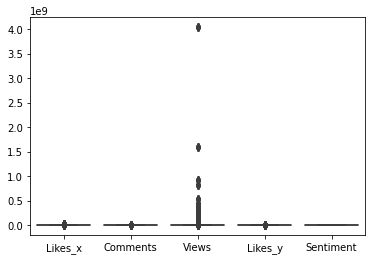

In [13]:
sns.boxplot(data=data2)

<AxesSubplot:xlabel='Views', ylabel='Likes_x'>

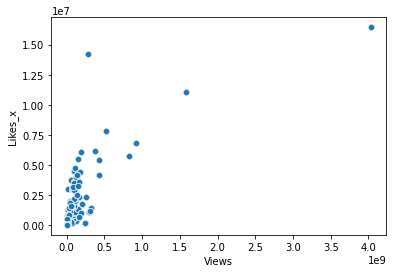

In [14]:
sns.scatterplot(x=data2["Views"],y=data2["Likes_x"])

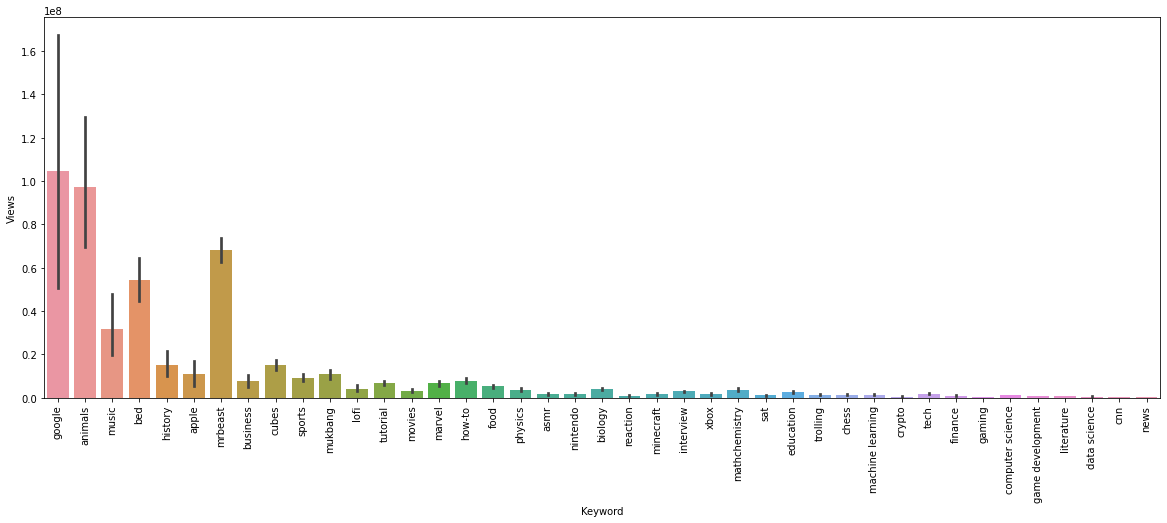

In [15]:
plt.figure(figsize=(20,7))
sns.barplot(x="Keyword",y="Views",data=data2.sort_values(by="Views",ascending=False))
plt.xticks(rotation=90)
plt.show()

In [16]:
data2["Keyword"].value_counts()

reaction            507
tutorial            501
game development    500
physics             500
asmr                500
trolling            500
cubes               499
interview           499
cnn                 497
history             496
machine learning    495
marvel              492
data science        492
sat                 490
mrbeast             489
xbox                488
minecraft           486
nintendo            480
how-to              479
food                479
computer science    475
tech                473
biology             470
sports              465
business            458
crypto              457
chess               457
mukbang             450
google              444
literature          441
bed                 435
music               429
movies              428
apple               419
gaming              407
lofi                384
animals             370
news                364
finance             319
education           240
mathchemistry       133
Name: Keyword, d

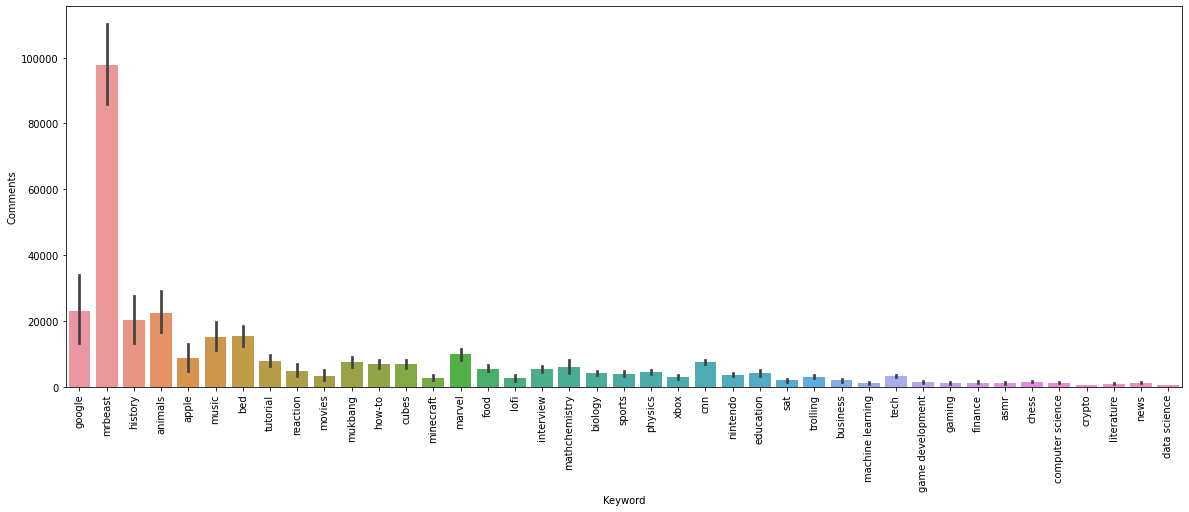

In [17]:
plt.figure(figsize=(20,7))
sns.barplot(x="Keyword",y="Comments",data=data2.sort_values(by="Comments",ascending=False))
plt.xticks(rotation=90)
plt.show()

In [18]:
data2.sort_values(by="Comments",ascending=False)["Comment"].head()

5379                                 0:01 melhor parte kk
5383    i remember when this first came out and i kept...
5381                                   Really Enjoyed it!
5380    I listened to this before and now I’m listenin...
5378    22/08/2022. Nostalgia de Respeito e Maravilhos...
Name: Comment, dtype: object

In [19]:
data2.describe()

,Likes_x,Comments,Views,Likes_y,Sentiment
count,1.836700e+04,18367.000000,1.836700e+04,18387.000000,18387.000000
mean,1.758958e+05,8115.041651,1.184928e+07,1051.613423,1.492794
std,8.089415e+05,38402.575655,1.096406e+08,10678.606026,0.710284
min,-1.000000e+00,-1.000000,2.500000e+01,0.000000,0.000000
25%,2.923000e+03,219.000000,9.363300e+04,5.000000,1.000000
50%,1.542500e+04,864.000000,6.137570e+05,29.000000,2.000000
75%,6.200900e+04,3491.000000,2.872679e+06,192.000000,2.000000
max,1.644556e+07,732818.000000,4.034122e+09,891372.000000,2.000000


In [20]:
scale = MinMaxScaler()
data2[["Likes_x","Comments","Views","Likes_y","Sentiment"]]= scale.fit_transform(data2[["Likes_x","Comments","Views","Likes_y","Sentiment"]])

In [21]:
data2.head()

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,Let's not forget that Apple Pay in 2014 requir...,0.000107,0.5
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,Here in NZ 50% of retailers don’t even have co...,0.000021,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,I will forever acknowledge this channel with t...,0.000181,1.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,Whenever I go to a place that doesn’t take App...,0.000009,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,"Apple Pay is so convenient, secure, and easy t...",0.000038,1.0


In [22]:
data2.describe()

,Likes_x,Comments,Views,Likes_y,Sentiment
count,18367.000000,18367.000000,18367.000000,18387.000000,18387.000000
mean,0.010696,0.011075,0.002937,0.001180,0.746397
std,0.049189,0.052404,0.027178,0.011980,0.355142
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000178,0.000300,0.000023,0.000006,0.500000
50%,0.000938,0.001180,0.000152,0.000033,1.000000
75%,0.003771,0.004765,0.000712,0.000215,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
data2.shape

(18387, 10)

In [24]:
# Max video Upload date
data2["Published At"].value_counts().sort_values(ascending=False).head()

2022-08-24    2722
2022-08-23    1742
2022-08-22     366
2022-08-20     361
2022-08-21     347
Name: Published At, dtype: int64

In [25]:
# Max View data
data["Views"].value_counts().sort_values(ascending=False).head()

1456270.0    2
95826.0      2
14537.0      2
51885.0      2
1564007.0    2
Name: Views, dtype: int64

In [26]:
data2["Title"]

0        Apple Pay Is Killing the Physical Wallet After...
1        Apple Pay Is Killing the Physical Wallet After...
2        Apple Pay Is Killing the Physical Wallet After...
3        Apple Pay Is Killing the Physical Wallet After...
4        Apple Pay Is Killing the Physical Wallet After...
                               ...                        
18382                     Don&#39;t learn machine learning
18383                     Don&#39;t learn machine learning
18384                     Don&#39;t learn machine learning
18385                     Don&#39;t learn machine learning
18386                     Don&#39;t learn machine learning
Name: Title, Length: 18387, dtype: object

In [27]:
# Max Views video Title
data2.groupby("Title")["Views"].value_counts().sort_values(ascending=False).head()

Title                                                                                                Views   
BLACKPINK - ‘Pink Venom’ DANCE PRACTICE VIDEO                                                        0.005909    36
ASMR Gaming 😴 Fortnite 1 Kill = 1 Trigger Relaxing Mouth Sounds 🎮🎧 Controller Sounds + Whispering 💤  0.000004    22
20 Minecraft Block Facts You Maybe Didn&#39;t Know                                                   0.000298    22
🚨 DÉPÊCHEZ-VOUS 🚨 Ces PROMOS disparaissent bientôt du PS Store, Xbox Store, Nintendo eShop...        0.000003    20
How to Solve a Rubik&#39;s Cube | WIRED                                                              0.007413    20
Name: Views, dtype: int64

In [28]:
data2.head(2)

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,Let's not forget that Apple Pay in 2014 requir...,0.000107,0.5
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,0.000207,0.000918,0.000034,Here in NZ 50% of retailers don’t even have co...,0.000021,0.0


In [29]:
# for i in data2.columns:
#     print(i.dtype)